In [36]:
import MatchingModelPoints as match
import FitFunction as fit
import FileManager as fm
import numpy as np
import matplotlib.pyplot as plt
import Image_preperation as prep
import PCA_analysis as PCA
import ActiveFitContour as af

def active_shape_scale_n_times(img, tooth_points, pca_tooth, length, scale, n_times):
    
    points = [0] * (n_times+1)
    points[0] = tooth_points
    
    scaled_img , scaled_tooth_points = scaling(img, tooth_points, 1/scale)
    edge_img = prep.calc_external_img_active_contour(scaled_img)
    new_points = active_shape(edge_img, scaled_tooth_points, pca_tooth, length)

    for i in range(n_times):
        new_points = active_shape(edge_img, new_points, pca_tooth, length)
        points[i+1] = np.around(new_points*scale)
        
    return points

def active_shape_scale(img, tooth_points, pca_tooth, length, scale):
    
    scaled_img , scaled_tooth_points = scaling(img, tooth_points, 1/scale)
    edge_img = prep.calc_external_img_active_contour(scaled_img)
    new_points = active_shape(edge_img, scaled_tooth_points, pca_tooth, length)
    new_img, new_scaled_points = scaling(scaled_img, new_points, scale)
    
    return new_scaled_points

def active_shape(edge_img, tooth_points, pca_tooth, length, alfa):

    #new_points, error = fit.fit_measure(tooth_points, length, edge_img)
    new_points = af.active_contour(tooth_points, edge_img, length, alfa)
    b, pose_param = match.match_model_points(new_points, pca_tooth)

    x = match.generate_model_point(b, pca_tooth)
    return match.inv_transform(x.reshape(40,2),pose_param)

def active_shape_n_times(edge_img, tooth_points, pca_tooth, length,alfa, n_times):
    
    points = [0] * (n_times+1)
    points[0] = tooth_points

    for i in range(n_times):
        points[i+1] = active_shape(edge_img, points[i], pca_tooth, length, alfa)
                   
    return points

def preperation(radiograph, tooth_variations):
    
    #median = prep.median_filter(radiograph)
#     edge_img = prep.edge_detection_low(median)

    edge_img = prep.calc_external_img_active_contour(radiograph)
    pca_tooth = PCA.PCA_analysis(tooth_variations, None)
    
    return edge_img, pca_tooth

def scaling(img, points, scale):
    new_img, new_points = fm.resolution_scale(img, points, scale)
    return new_img, new_points


def show_evolution(img, points_list):
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 7))
    n = len(points_list)
    hn = int(n/2)
    
    for i, landmark in enumerate(points_list):
        plt.subplot(2, hn, i+1)
        plt.imshow(img)
        plt.xticks(())
        plt.yticks(())   
        plt.plot(landmark[:,0], landmark[:,1], 'ro',  markersize=1)
     
    plt.show()

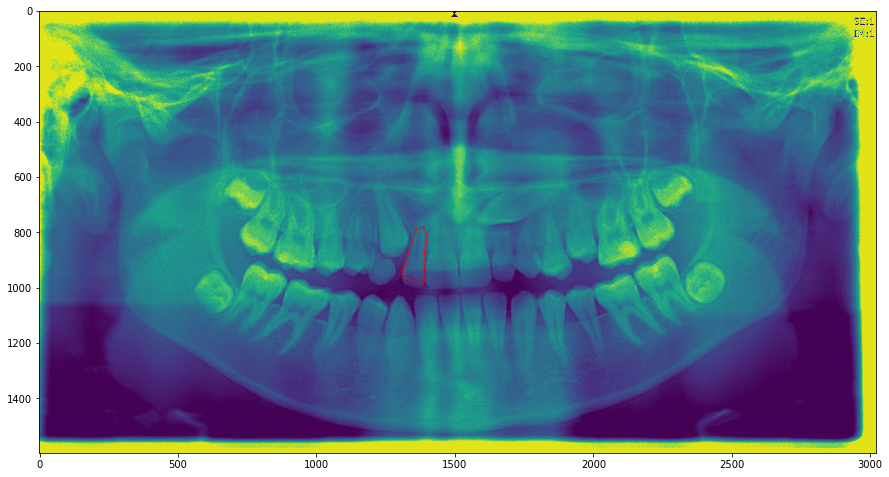

In [92]:
if __name__ == "__main__":
    
    teeth = np.load('initial_position.npy')
    tooth = teeth[0,0]
    tooth = tooth/0.3

    radiographs = fm.load_radiographs()
    radiograph = radiographs[0]

    landmarks = fm.load_landmarks_std()
    tooth_variations = landmarks[:,0]

    edge_img, pca_tooth = preperation(radiograph, tooth_variations)

    fig, ax = plt.subplots(figsize=(15, 15))
    plt.imshow(radiograph)
    plt.plot(tooth[:,0], tooth[:,1], 'ro', markersize=1)
    plt.show()

In [95]:
    points = active_shape_n_times(edge_img, tooth, pca_tooth, 5, 10)

0 127.28036942304038
0 64.39844347037541
0 201.9258186289713
0 38.58416963912774
0 27.401378451346257
0 173.35674950797727
0 47.68544336389267
0 168.6318420031685
0 8.522188718794801
0 34.95193039373115


In [102]:
    new_points = points[1]

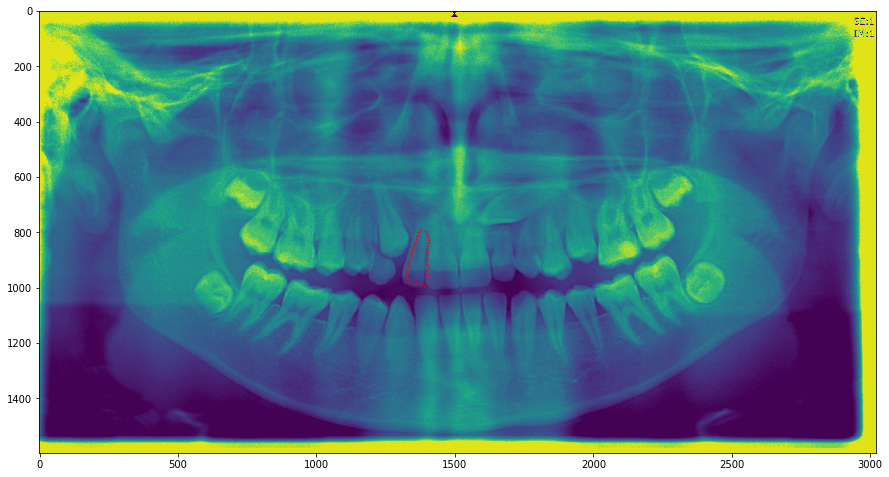

In [103]:
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.imshow(radiograph)
    plt.plot(new_points[:,0], new_points[:,1], 'ro', markersize=1)
    plt.show()

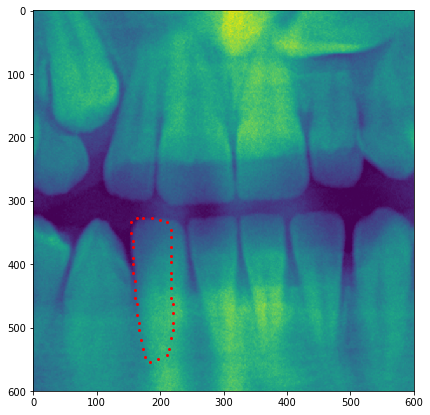

In [3]:
    img = fm.load_img_piece()
    tooth = fm.load_tooth_of_piece(4)
    landmarks = fm.load_landmarks_std()
    tooth_variations = landmarks[:,4]
    edge_img, pca_tooth = preperation(img, tooth_variations)
    fm.show_with_points(img, tooth)

In [38]:
    #points_array = active_shape_scale_n_times(img, tooth, pca_tooth, 15, 4, 10)
    points_array = active_shape_n_times(edge_img, tooth, pca_tooth, 10, 20 ,9)

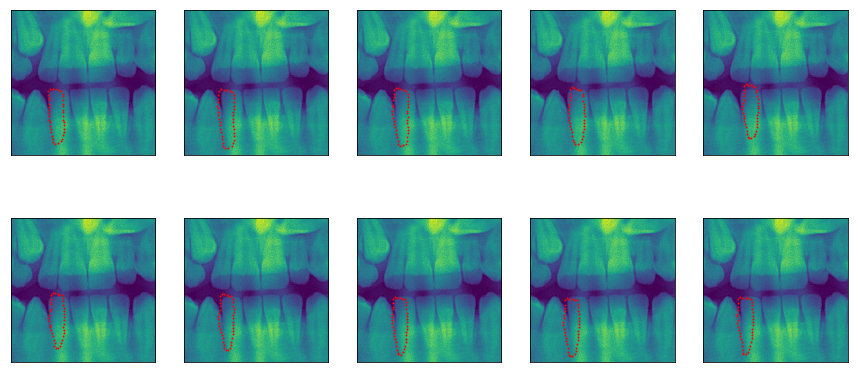

In [39]:
    show_evolution(img, points_array)

In [22]:
points_array[0].shape

(40, 2)